# Python Insights - Analisando Dados com Python

### Case - Cancelamento de Clientes

Você foi contratado por uma empresa com mais de 800 mil clientes para um projeto de Dados. Recentemente a empresa percebeu que da sua base total de clientes, a maioria são clientes inativos, ou seja, que já cancelaram o serviço.

Precisando melhorar seus resultados ela quer conseguir entender os principais motivos desses cancelamentos e quais as ações mais eficientes para reduzir esse número.

<hr> 

### Passo a Passo 📓

No terminal:
pip install pandas numpy openpyxl nbformat ipykernel plotly

1. Importar base de dados
2. Visualizar base de dados (entender a base + identificar problemas)
3. Corrigir os problemas da base de dado (tratamento de dados)
4. Análise Inicial (quantos clientes cancelaram e % de clientes)
5. Análise da causa de cancelamento dos clientes (Comparar as colunas da tabela com a coluna de cancelamento)

In [21]:
# 1
import pandas as pd
tabela = pd.read_csv('cancelamentos.csv')

# 2
# Apagando a coluna que n agrega:
tabela = tabela.drop(columns='CustomerID')

#print(tabela)
display(tabela)

,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
881661,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
881662,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
881663,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
881664,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [22]:
# 3 
# PROBLEMA: valores vazios

display(tabela.info()) #antes

tabela = tabela.dropna() # -> NaN -> Not a Number = valores vazios

display(tabela.info()) #depois

# float -> numero com casa decimal
# object -> coluna com valores de texto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881666 entries, 0 to 881665
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idade                   881664 non-null  float64
 1   sexo                    881664 non-null  object 
 2   tempo_como_cliente      881663 non-null  float64
 3   frequencia_uso          881663 non-null  float64
 4   ligacoes_callcenter     881664 non-null  float64
 5   dias_atraso             881664 non-null  float64
 6   assinatura              881661 non-null  object 
 7   duracao_contrato        881663 non-null  object 
 8   total_gasto             881664 non-null  float64
 9   meses_ultima_interacao  881664 non-null  float64
 10  cancelou                881664 non-null  float64
dtypes: float64(8), object(3)
memory usage: 74.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 881659 entries, 0 to 881665
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idade                   881659 non-null  float64
 1   sexo                    881659 non-null  object 
 2   tempo_como_cliente      881659 non-null  float64
 3   frequencia_uso          881659 non-null  float64
 4   ligacoes_callcenter     881659 non-null  float64
 5   dias_atraso             881659 non-null  float64
 6   assinatura              881659 non-null  object 
 7   duracao_contrato        881659 non-null  object 
 8   total_gasto             881659 non-null  float64
 9   meses_ultima_interacao  881659 non-null  float64
 10  cancelou                881659 non-null  float64
dtypes: float64(8), object(3)
memory usage: 80.7+ MB


None

In [23]:
# 4
# quantos clientes cancelaram? coluna 'cancelou'
# 0 = não cancelou; 1 = cancelou

#identifica nas LISTA de colunas, a coluna 'cancelou', conta os valores, e os exibe(em percentual):
display(tabela['cancelou'].value_counts(normalize=True))

cancelou
1.0    0.567105
0.0    0.432895
Name: proportion, dtype: float64

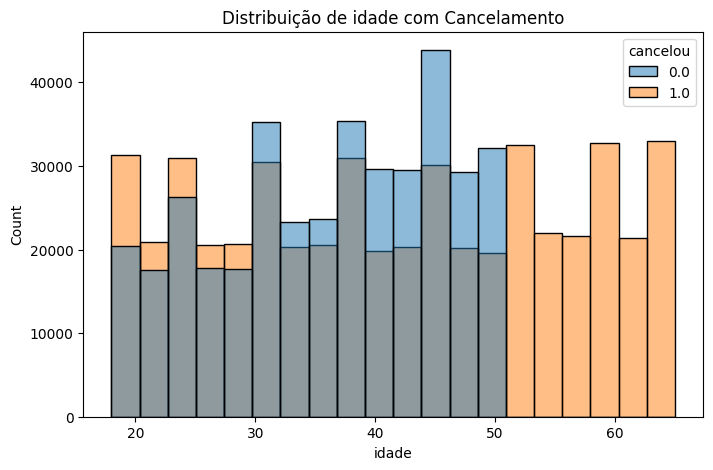

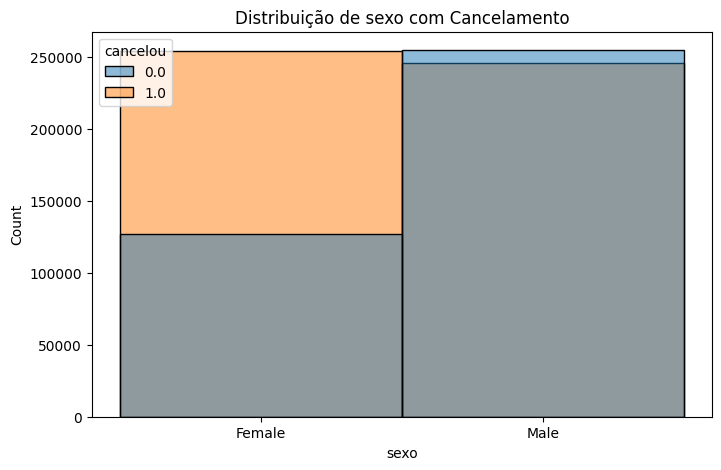

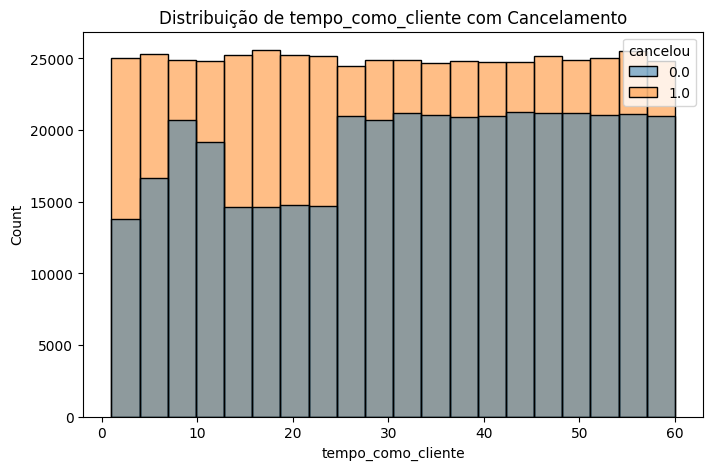

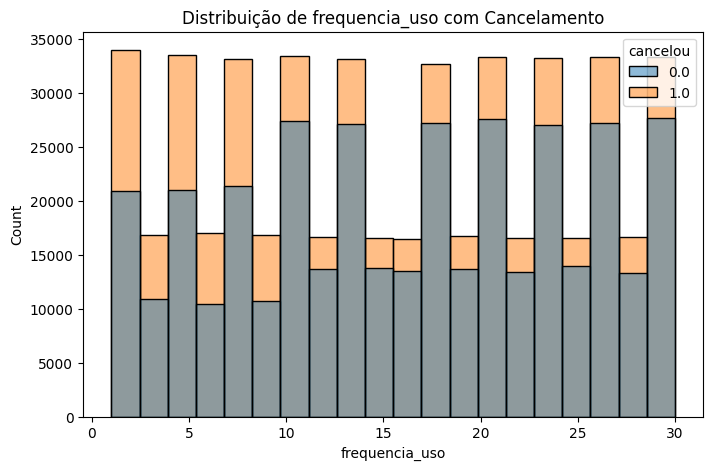

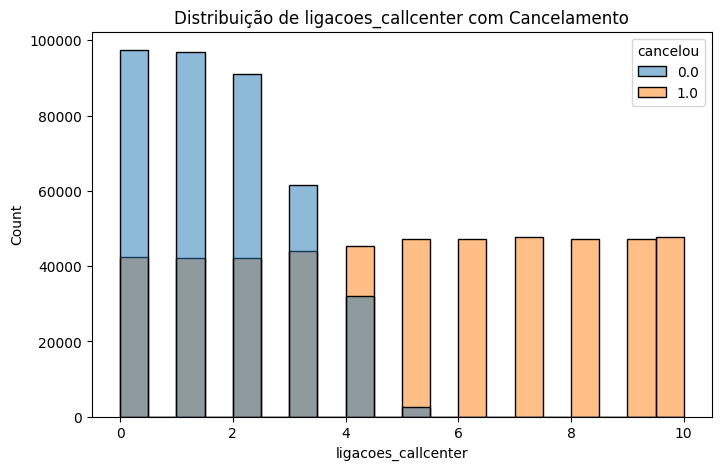

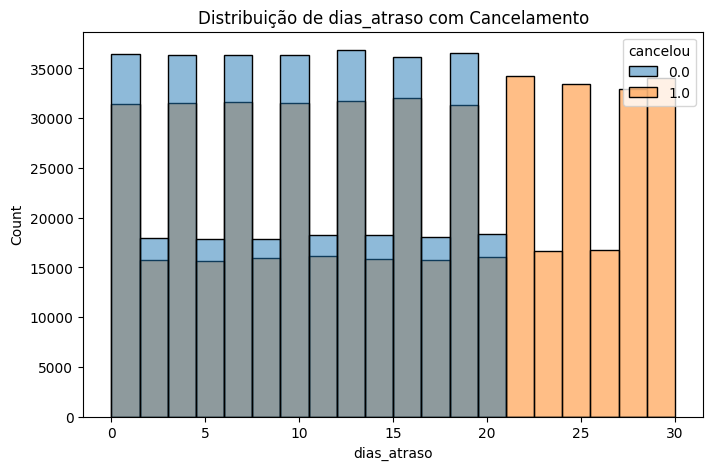

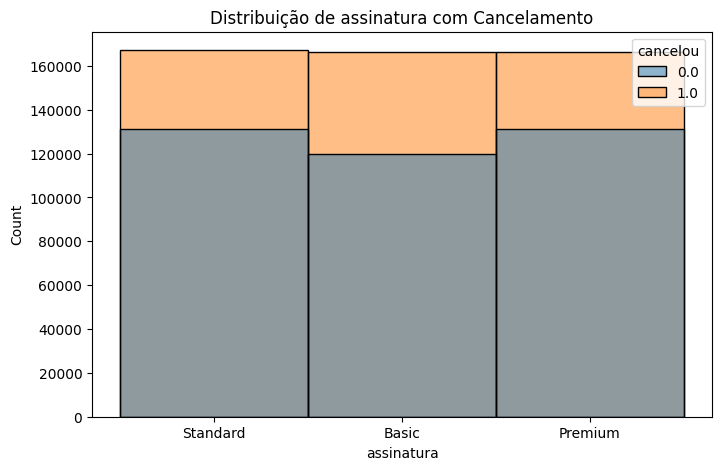

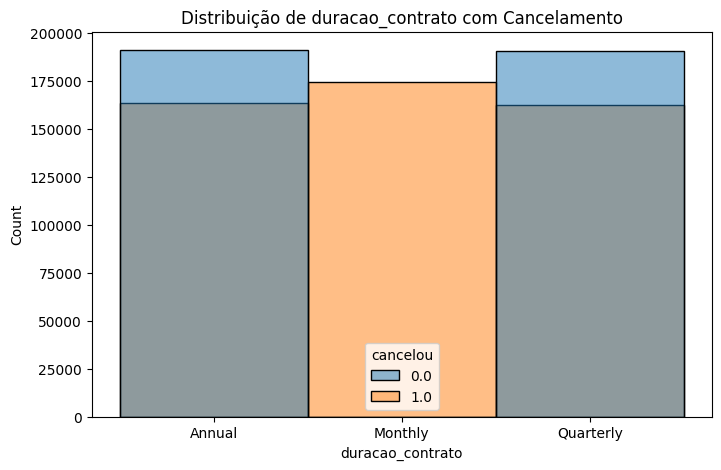

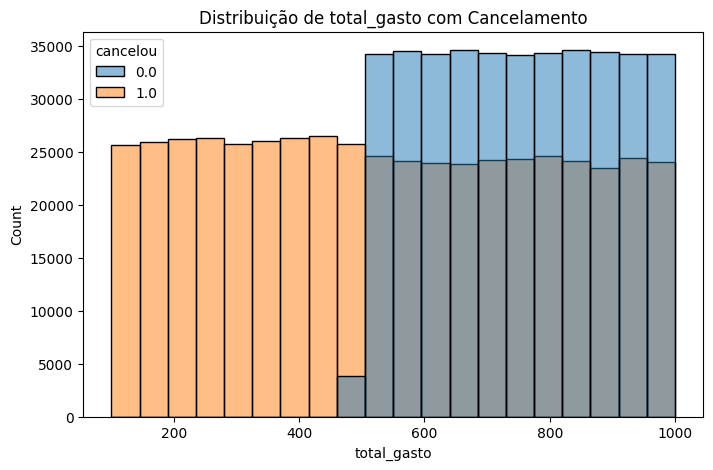

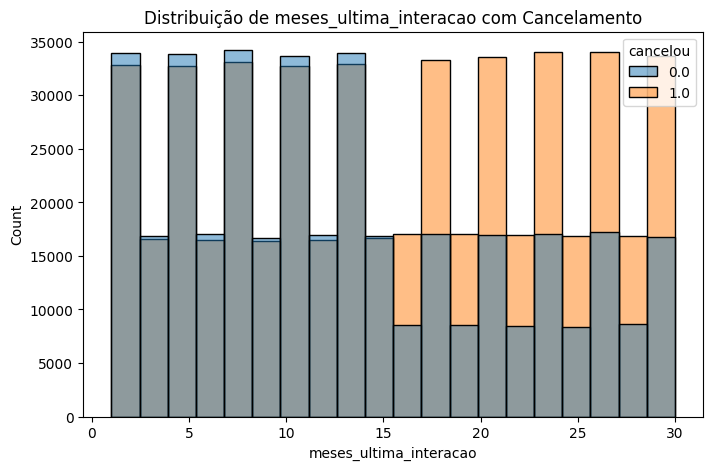

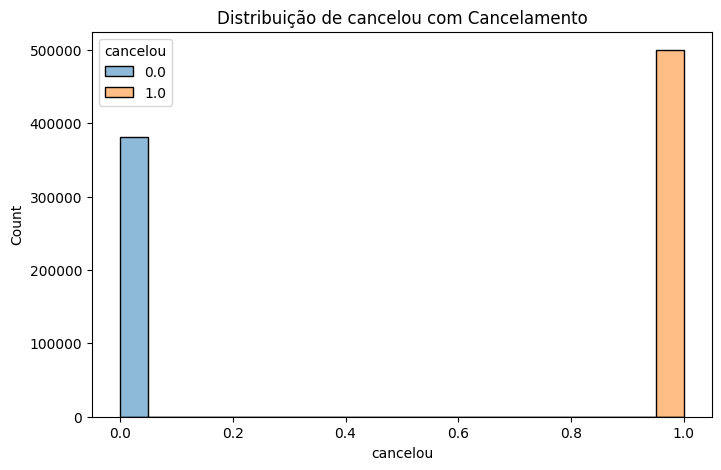

In [24]:
# 5 
# Comparar as colunas da tabela com a coluna de cancelamento

import matplotlib.pyplot as plt
import seaborn as sns

# GRÁFICOS  
for coluna in tabela.columns:
    # Criar figura
    plt.figure(figsize=(8, 5))
    
    # Criar o gráfico com seaborn
    sns.histplot(data=tabela, x=coluna, hue="cancelou", kde=False, bins=20)
    
    # Adicionar título
    plt.title(f"Distribuição de {coluna} com Cancelamento")
    
    # Exibir o gráfico
    plt.show()

In [25]:
#duração contrato -> diferente de mensal
tabela = tabela[tabela['duracao_contrato']!='Monthly']

#ligações call center -> menor ou igual a 4
tabela = tabela[tabela['ligacoes_callcenter']<=4]

#atraso pagamento -> menor igual a 20 dias
tabela = tabela[tabela['dias_atraso']<=20]

display(tabela["cancelou"].value_counts())
# em percentual
display(tabela["cancelou"].value_counts(normalize=True))

cancelou
0.0    379032
1.0     85447
Name: count, dtype: int64

cancelou
0.0    0.816037
1.0    0.183963
Name: proportion, dtype: float64

#### Conclusão
1. Todos os assinantes do contrato mensal cancelam;
    - Oferecer desconto nos planos anuais e trimestrais
2. Clientes que ligam mais do que 4 vezes para o call center, cancelam;
    - Criar um processo para resolver o problema do cliente em no máximo 3 ligações.
3. Clientes que atrasaram mais de 20 dias, cancelaram;
    - Política de resolver atrasos em até 10 dias (equipe financeira).